# II- Importation des données dans un frame pandas :

In [15]:
#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "ObesityDataSet.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
data = pd.read_csv("dataFlight_version_2.csv",index_col=0)
#afficher les 10 premières lignes avec data.head(10)
data

,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
Year,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",...,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",...,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",...,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
2006,1,1,15,7,US Airways Inc.,Newark Liberty International Airport,"Newark, NJ",New Jersey,Charlotte Douglas International Airport,"Charlotte, NC",...,529.0,3,0.0,0.0,0.0,0.0,32.0,Jan,1,465_US Airways Inc._2006-01-15
2006,3,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,"Boston, MA",Massachusetts,Cleveland Hopkins International Airport,"Cleveland, OH",...,563.0,3,0.0,0.0,0.0,0.0,0.0,Aug,1,1431_Continental Air Lines Inc._2006-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4,12,27,3,Delta Airlines,Hartsfield-Jackson Atlanta International Airport,"Atlanta, GA",Georgia,San Antonio International Airport,"San Antonio, TX",...,874.0,4,0.0,0.0,0.0,0.0,0.0,Dec,0,1871_Delta Airlines_2017-12-27
2008,1,3,23,7,Southwest Airlines,McCarran International Airport,"Las Vegas, NV",Nevada,Phoenix Sky Harbor International Airport,"Phoenix, AZ",...,256.0,2,0.0,0.0,0.0,0.0,0.0,Mar,0,966_Southwest Airlines_2008-03-23
2003,4,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",...,168.0,1,0.0,0.0,0.0,0.0,0.0,Nov,0,1457_US Airways Inc._2003-11-14


In [16]:
data = data.reset_index() # convertir l'index "Month" en colonne
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'DepDelay', 'DepDelayMinutes',
       'CRSArrTime', 'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted',
       'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB',
       'FLIGHT_STATUS', 'Unique_Flight_ID'],
      dtype='object')

In [17]:
data = data[['Month', 'DayofMonth','DayOfWeek','Reporting_Airline','Origin','Dest','ArrDelayMinutes']]
data.head()

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayMinutes
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0.0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,0.0
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,0.0
3,1,15,7,US Airways Inc.,Newark Liberty International Airport,Charlotte Douglas International Airport,32.0
4,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,Cleveland Hopkins International Airport,2.0


In [18]:
# Fonction pour déterminer la catégorie de retard en fonction de la valeur de ArrDelay
def categorize_arrdelay(arr_delay):
    if arr_delay <= 15:
        return 0
    elif 16 <= arr_delay <= 60:
        return 1
    else:
        return 2

# Appliquer la fonction de catégorisation à la colonne ArrDelay et créer la nouvelle colonne ArrDelayCategory
data['ArrDelayCategory'] = data['ArrDelayMinutes'].apply(categorize_arrdelay)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne ArrDelayCategory
data.head(5).append(data.tail(5))

C:\Users\naitmaam\AppData\Local\Temp\ipykernel_36900\4225931862.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(5).append(data.tail(5))


,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayMinutes,ArrDelayCategory
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0.0,0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,0.0,0
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,0.0,0
3,1,15,7,US Airways Inc.,Newark Liberty International Airport,Charlotte Douglas International Airport,32.0,1
4,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,Cleveland Hopkins International Airport,2.0,0
1164836,12,27,3,Delta Airlines,Hartsfield-Jackson Atlanta International Airport,San Antonio International Airport,0.0,0
1164837,3,23,7,Southwest Airlines,McCarran International Airport,Phoenix Sky Harbor International Airport,0.0,0
1164838,11,14,5,US Airways Inc.,Charleston International Airport,Charlotte Douglas International Airport,0.0,0
1164839,5,15,2,Southwest Airlines,Chicago Midway International Airport,Nashville International Airport,0.0,0
1164840,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,0.0,0


In [19]:
# Compter le nombre de valeurs pour chaque catégorie de la colonne 'ArrDelayCategory'
value_counts = data['ArrDelayCategory'].value_counts()

# Afficher le nombre de valeurs pour chaque catégorie
print('Nombre de valeurs à 0 :', value_counts[0])
print('Nombre de valeurs à 1 :', value_counts[1])
print('Nombre de valeurs à 2 :', value_counts[2])

Nombre de valeurs à 0 : 947874
Nombre de valeurs à 1 : 150999
Nombre de valeurs à 2 : 65968


### Afficher les dimensions de la table des données (propriété shape)

In [20]:
data.shape

(1164841, 8)

### Afficher la liste des colonnes data.columns

In [21]:
data = data.reset_index() # convertir l'index "Month" en colonne
data.columns

Index(['index', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline',
       'Origin', 'Dest', 'ArrDelayMinutes', 'ArrDelayCategory'],
      dtype='object')

### Afficher la liste des colonnes et leurs types (propriété dtypes)

In [22]:
data.dtypes

index                  int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
Reporting_Airline     object
Origin                object
Dest                  object
ArrDelayMinutes      float64
ArrDelayCategory       int64
dtype: object

# III- Préparation des données d'apprentissage

## 1- Vérification des données
1. Vérifier s'il y a des valeurs non renseignées (nulles)
`print(data.isnull().sum())`
2. Afficher la description des données avec la fonction describe: `data.describe()`



In [23]:
#compter les valeurs nulles
print(data.isnull().sum())
#description des données
data.describe()


index                0
Month                0
DayofMonth           0
DayOfWeek            0
Reporting_Airline    0
Origin               0
Dest                 0
ArrDelayMinutes      0
ArrDelayCategory     0
dtype: int64


,index,Month,DayofMonth,DayOfWeek,ArrDelayMinutes,ArrDelayCategory
count,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06
mean,5.824200e+05,6.444342e+00,1.572636e+01,3.931258e+00,1.231862e+01,2.428958e-01
std,3.362608e+05,3.435304e+00,8.774359e+00,1.991238e+00,3.551927e+01,5.451265e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.912100e+05,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,5.824200e+05,6.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00,0.000000e+00
75%,8.736300e+05,9.000000e+00,2.300000e+01,6.000000e+00,9.000000e+00,0.000000e+00
max,1.164840e+06,1.200000e+01,3.100000e+01,7.000000e+00,1.898000e+03,2.000000e+00


In [24]:
data = data.drop("ArrDelayMinutes", axis=1)

In [25]:
data.describe()

,index,Month,DayofMonth,DayOfWeek,ArrDelayCategory
count,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06,1.164841e+06
mean,5.824200e+05,6.444342e+00,1.572636e+01,3.931258e+00,2.428958e-01
std,3.362608e+05,3.435304e+00,8.774359e+00,1.991238e+00,5.451265e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.912100e+05,3.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00
50%,5.824200e+05,6.000000e+00,1.600000e+01,4.000000e+00,0.000000e+00
75%,8.736300e+05,9.000000e+00,2.300000e+01,6.000000e+00,0.000000e+00
max,1.164840e+06,1.200000e+01,3.100000e+01,7.000000e+00,2.000000e+00


## 2- Transformation des données
1. Transformer les données texte en utlisant `LabelEncoder`

2. Transformer les données booléennes en utilisant `LabelBinarizer`


In [26]:

from sklearn import preprocessing
import pickle

Encoder1 =preprocessing.LabelEncoder()



# Create a dictionary to store the encoders
encoders = {}

# Iterate over each column that requires encoding
columns_to_encode = ['Origin','Dest','Reporting_Airline']
for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders[column] = le

    # Save the encoder as a pickle file
    output = open(f'{column}_encoder.pkl', 'wb')
    pickle.dump(le, output)
    output.close()


#afficher les 10 premières lignes
data.head()

,index,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelayCategory
0,0,5,28,4,1,122,258,0
1,1,6,29,6,10,130,77,0
2,2,8,31,2,8,199,89,0
3,3,1,15,7,24,241,55,1
4,4,8,7,1,7,33,66,0


### Afficher la liste des colonnes et leurs nouveaux types (propriété dtypes)

In [27]:
data.dtypes

index                int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
Reporting_Airline    int32
Origin               int32
Dest                 int32
ArrDelayCategory     int64
dtype: object

## 3- Séparation des données input(X)/output(Y)

 Transformer le tableau pandas en matrice Numpy (avec la fonction to_numpy) et séparer ensuite les données explicatives X (16 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [28]:
X =  data[['Month', 'DayofMonth','DayOfWeek','Reporting_Airline','Origin','Dest']]

Y = data['ArrDelayCategory']

## 3- Découpage des données train/test

1. Découper  les données `x_nomalized` ou `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon train est égale à 70% (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x_train, y_train) à partir de  `x_nomalized` ou `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [29]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split
#subdivision des données  éch.app = 70%

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(X_train).head()


(931872, 6) (232969, 6) (931872,) (232969,)


,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest
550376,8,26,7,24,270,202
604135,4,9,4,11,65,41
1048089,7,23,4,22,75,224
299604,5,13,1,6,54,314
508181,7,7,4,19,64,54


## Application de la méthode StandardScalar()

In [30]:
x_normalized=preprocessing.StandardScaler().fit_transform(X)

## Découpage après scaling méthide StandardScalar()

In [31]:
X_train_op1, X_test_op1, y_train_op1, y_test_op1 = train_test_split(x_normalized, Y, test_size=0.2, random_state=42)

print(X_train_op1.shape, X_test_op1.shape, y_train_op1.shape, y_test_op1.shape)
pd.DataFrame(X_train_op1).head()

(931872, 6) (232969, 6) (931872,) (232969,)


,0,1,2,3,4,5
0,0.452844,1.170871,1.541123,1.230328,0.874791,0.195482
1,-0.711536,-0.766594,0.034522,-0.541669,-1.115963,-1.357688
2,0.161749,0.828965,0.034522,0.957713,-1.018853,0.407716
3,-0.420441,-0.310720,-1.472079,-1.223206,-1.222784,1.275948
4,0.161749,-0.994531,0.034522,0.548790,-1.125674,-1.232277


# RandomForest (avec méthode StandardScalar)

In [32]:
from sklearn.ensemble import RandomForestClassifier
 #instanciation de l’objet 
rf_model=RandomForestClassifier()
#affichage des paramètres paramètres par défaut ici c.à d. noyau ‘ rbf

print(rf_model)
#exécution de l'instance sur les données d'apprentissage
rf_model.fit(X_train_op1, y_train_op1)

# Use the predict method to get the predicted values for the test data
y_pred_rf1 = rf_model.predict(X_test_op1)
from sklearn import metrics


# Calculate the accuracy score using metrics.accuracy_score and print it
model_score_rf1 = metrics.accuracy_score(y_test_op1, y_pred_rf1)
print(model_score_rf1)

RandomForestClassifier()
0.7942258412063408


In [33]:


# Sauvegarder le modèle
with open('rf_model3.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

## Application de la méthode MinMAXScaler

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

x_scaled=preprocessing.MinMaxScaler().fit_transform(X)

## Découpage après applicaion de la méthode MinMaxScaler

In [35]:
X_train_op2, X_test_op2, y_train_op2, y_test_op2 = train_test_split(x_scaled, Y, test_size=0.2, random_state=42)

print(X_train_op1.shape, X_test_op2.shape, y_train_op2.shape, y_test_op2.shape)
pd.DataFrame(X_train_op2).head()

(931872, 6) (232969, 6) (931872,) (232969,)


,0,1,2,3,4,5
0,0.636364,0.833333,1.0,0.923077,0.688776,0.511392
1,0.272727,0.266667,0.5,0.423077,0.165816,0.103797
2,0.545455,0.733333,0.5,0.846154,0.191327,0.567089
3,0.363636,0.400000,0.0,0.230769,0.137755,0.794937
4,0.545455,0.200000,0.5,0.730769,0.163265,0.136709


# RandomForest (avec méthode MinMaxScalar)

In [36]:

 #instanciation de l’objet 
rf_model2=RandomForestClassifier()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf


#exécution de l'instance sur les données d'apprentissage
rf_model2.fit(X_train_op2, y_train_op2)

# Use the predict method to get the predicted values for the test data
y_pred_rf2 = rf_model2.predict(X_test_op2)

# Calculate the accuracy score using metrics.accuracy_score and print it
model_score_rf2 = metrics.accuracy_score(y_test_op2, y_pred_rf2)
print(model_score_rf2)

0.794067021792599


# VIII- Validation des modèles

1. Calculer les scores TPR et FPR de chaque modèle généré et les ajouter dans des listes

2. Afficher chaque score avec une courbe ou histogramme

Comparer les résultats

In [37]:
#Importer le module metric
from sklearn import metrics
#Importer le Pyplot
import matplotlib.pyplot as plt
import seaborn as sns
#Calculer les scores des modèles


lr_model_score_rf1=metrics.accuracy_score(y_test_op1, y_pred_rf1)
lr_model_score_rf2=metrics.accuracy_score(y_test_op2, y_pred_rf2)


print("score randomForest méthode StandardScalar:",lr_model_score_rf1)
print("score randomForest  méthode MINMAXScalar: ",lr_model_score_rf2)

score randomForest méthode StandardScalar: 0.7942258412063408
score randomForest  méthode MINMAXScalar:  0.794067021792599


In [38]:
from sklearn.metrics import  classification_report

report = classification_report(y_test_op2, y_pred_rf2) 
print("\nRapport de classification:\n", report) 


Rapport de classification:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89    189402
           1       0.17      0.03      0.06     30315
           2       0.12      0.02      0.03     13252

    accuracy                           0.79    232969
   macro avg       0.37      0.34      0.32    232969
weighted avg       0.69      0.79      0.73    232969



# Matrice de confusion des modèles 

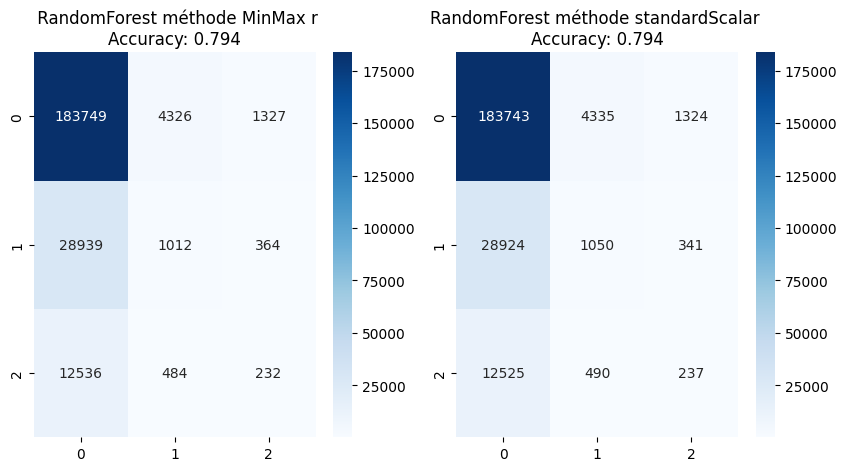

In [43]:
#Afficher les matrices de confusion des modèles



matrix_rf1 = metrics.confusion_matrix(y_test_op1, y_pred_rf1)
matrix_rf2=metrics.confusion_matrix(y_test_op2, y_pred_rf2)


# Créer la figure avec deux sous-plots côte à côte
fig, ((ax1, ax2)) =plt.subplots(ncols=2, nrows=1, figsize=(10,5))


# Afficher la deuxième matrice de confusion
sns.heatmap(matrix_rf2, annot=True, cmap="Blues", fmt="d", ax=ax1)
ax1.set_title(f" RandomForest méthode MinMax r\nAccuracy: {lr_model_score_rf2:.3f}")


# Afficher la première matrice de confusion
sns.heatmap(matrix_rf1, annot=True, cmap="Blues", fmt="d", ax=ax2)
ax2.set_title(f"RandomForest méthode standardScalar \nAccuracy: {lr_model_score_rf1:.3f}")

# Afficher la deuxième matrice de confusion
#sns.heatmap(matrix_rf2, annot=True, cmap="Blues", fmt="d", ax=ax5)
#ax5.set_title(f"RandomForest méthode MinMaxScalar\nAccuracy: {lr_model_score_rf2:.3f}")
# Afficher la figure
plt.show()
